In [ ]:
# Setup & Imports

# inline plotting
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # optional but recommended for nicer plots

# Reproducibility
np.random.seed(42)

# Display options for wider tables and more columns
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 100)

# Plotting defaults
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

# Seaborn theme for clean aesthetics
sns.set_theme(context="notebook")

# Print versions for reproducibility (helps when you share the notebook)
print("Versions -> pandas:", pd.__version__, "| numpy:", np.__version__, "| seaborn:", sns.__version__)


Versions -> pandas: 2.2.2 | numpy: 2.0.2 | seaborn: 0.13.2


In [ ]:
# Load Data

# File name to load
file_path = "train.csv"

# Load into a pandas DataFrame
df = pd.read_csv(file_path)

# Basic checks
print("File loaded from:", os.path.abspath(file_path))
print("Shape (rows, columns):", df.shape)

# View first 3 rows
display(df.head(3))

# View 3 random rows for variety
display(df.sample(3, random_state=42))


File loaded from: /content/train.csv
Shape (rows, columns): (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


In [ ]:
#Initial Overview

# 1) Info: column names, non-null counts, data types
print("=== DataFrame Info ===")
df.info()

# 2) Describe: summary stats (include='all' shows both numeric & categorical)
print("\n=== Summary Statistics (transposed) ===")
display(df.describe(include='all').T)

# 3) Missing values summary
print("\n=== Missing Values Summary ===")
missing_summary = (
    df.isnull()
      .sum()
      .to_frame(name='MissingCount')
      .assign(MissingPct=lambda x: 100 * x['MissingCount'] / len(df))
      .sort_values(by='MissingCount', ascending=False)
)
display(missing_summary)


=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Summary Statistics (transposed) ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292



=== Missing Values Summary ===


,MissingCount,MissingPct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [ ]:
# Column Standardization & Dtypes

# Show dtypes before change
print("=== Data Types Before ===")
display(df.dtypes)

# Convert certain columns to more appropriate types
df['Survived'] = df['Survived'].astype(int)  # ensure integer 0/1
df['Pclass']   = df['Pclass'].astype('category')
df['Sex']      = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Keep Cabin and Ticket as strings (object type)
df['Cabin']  = df['Cabin'].astype(str)
df['Ticket'] = df['Ticket'].astype(str)

# Show dtypes after change
print("\n=== Data Types After ===")
display(df.dtypes)


=== Data Types Before ===


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64



=== Data Types After ===


,0
PassengerId,int64
Survived,int64
Pclass,category
Name,object
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


/tmp/ipython-input-1253475835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='pastel')
/tmp/ipython-input-1253475835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='pastel')
/tmp/ipython-input-1253475835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='pastel')
/tmp/ipython-input-1253475835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

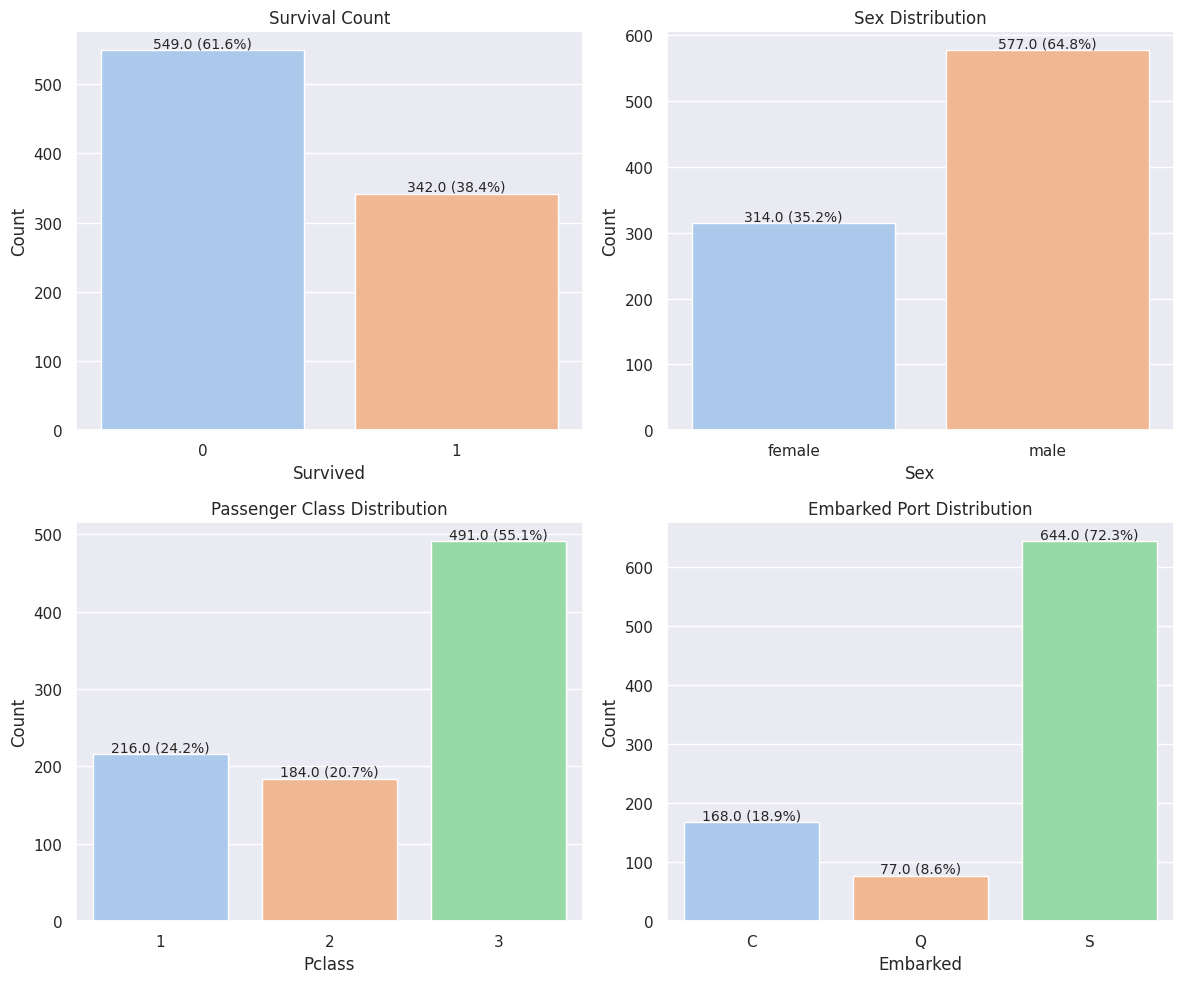

In [ ]:
# Target & Key Categorical Distributions

# Set up a grid of count plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of categorical columns to visualize
cat_cols = ['Survived', 'Sex', 'Pclass', 'Embarked']
titles   = ['Survival Count', 'Sex Distribution', 'Passenger Class Distribution', 'Embarked Port Distribution']

for ax, col, title in zip(axes.flatten(), cat_cols, titles):
    sns.countplot(x=col, data=df, ax=ax, palette='pastel')
    total = len(df)

    # Add percentage labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height} ({height/total:.1%})',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


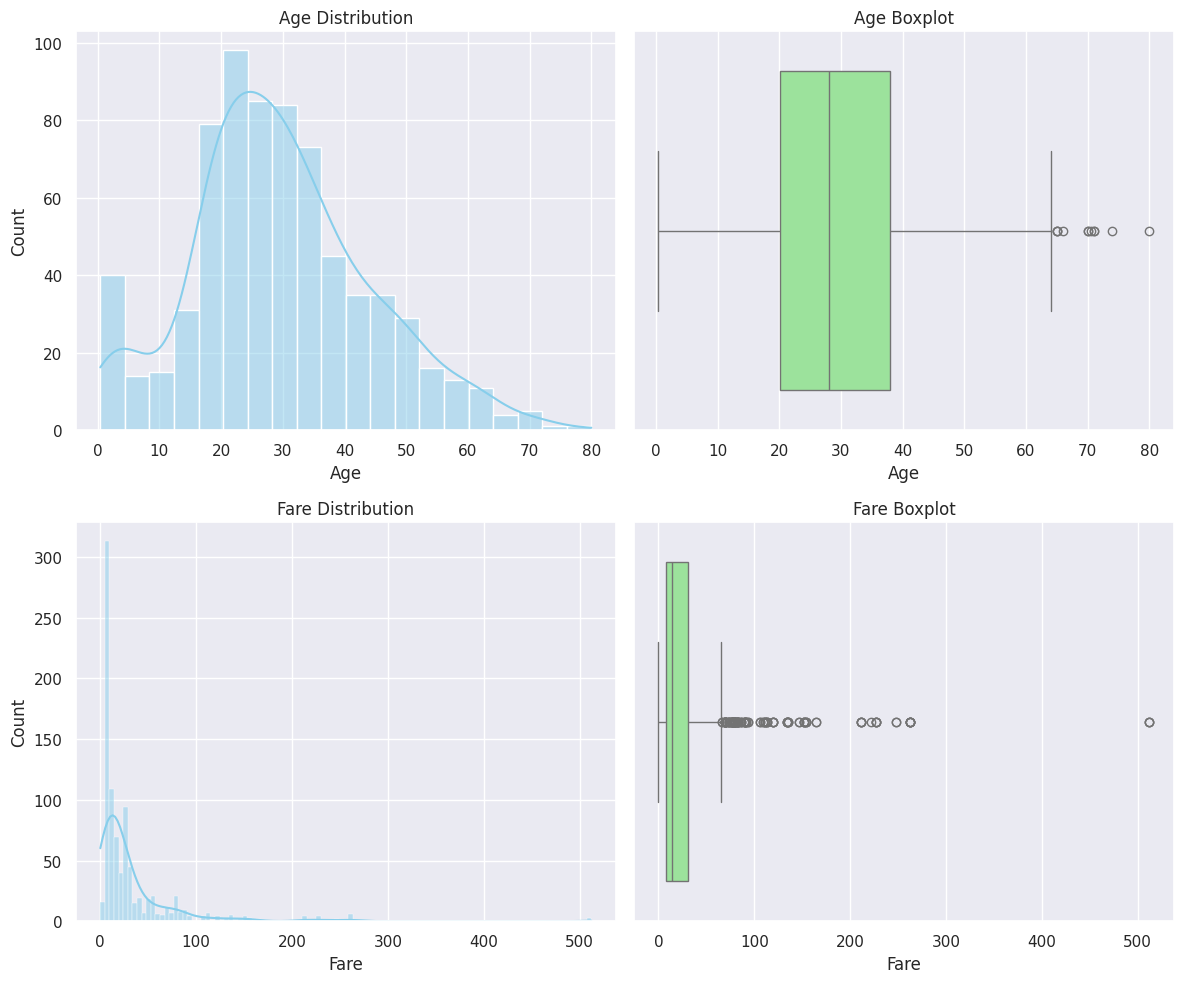

=== Basic Statistics ===

Age:
  Mean   : 29.70
  Median : 28.00
  IQR    : 17.88

Fare:
  Mean   : 32.20
  Median : 14.45
  IQR    : 23.09


In [ ]:
# Numeric Distributions & Outliers

num_cols = ['Age', 'Fare']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(num_cols):
    # Histogram + KDE
    sns.histplot(df[col], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'{col} Distribution')

    # Boxplot for outlier detection
    sns.boxplot(x=df[col], ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

# Basic stats
print("=== Basic Statistics ===")
for col in num_cols:
    col_data = df[col].dropna()
    print(f"\n{col}:")
    print(f"  Mean   : {col_data.mean():.2f}")
    print(f"  Median : {col_data.median():.2f}")
    print(f"  IQR    : {col_data.quantile(0.75) - col_data.quantile(0.25):.2f}")


In [ ]:
# Missing Data Strategy & Imputation

# Recheck missingness
print("=== Missing Values Before Imputation ===")
missing_summary = (
    df.isnull()
      .sum()
      .to_frame(name='MissingCount')
      .assign(MissingPct=lambda x: 100 * x['MissingCount'] / len(df))
      .sort_values(by='MissingCount', ascending=False)
)
display(missing_summary)

# --- Age ---
# If Name exists, use median Age by extracted Title; else use overall median
if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
    age_median_by_title = df.groupby('Title')['Age'].median()
    df['Age'] = df.apply(
        lambda row: age_median_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'],
        axis=1
    )
else:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# --- Embarked ---
if df['Embarked'].isnull().sum() > 0:
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)

# --- Fare ---
if df['Fare'].isnull().sum() > 0:
    median_fare = df['Fare'].median()
    df['Fare'].fillna(median_fare, inplace=True)

# --- Cabin ---
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if x.strip() == "" or x.strip().lower() == "nan" else 1)

# Final missingness check
print("\n=== Missing Values After Imputation ===")
display(df.isnull().sum())


=== Missing Values Before Imputation ===


,MissingCount,MissingPct
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000



=== Missing Values After Imputation ===


/tmp/ipython-input-3196863897.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Feature Engineering

# Extract Title from Name if Name exists
if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.').iloc[:, 0]

    # Group rare titles into "Other"
    rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
    df['Title'] = df['Title'].replace(rare_titles, 'Other')
    df['Title'] = df['Title'].astype('category')

# FamilySize = SibSp + Parch + 1 (self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone flag
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Optional: Deck from Cabin’s first letter (if not missing)
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x.strip() and x.strip().lower() != "nan" else "Unknown")
df['Deck'] = df['Deck'].astype('category')

# Show preview
display(df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,HasCabin,FamilySize,IsAlone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,Mr,0,2,0,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,Miss,0,1,1,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,2,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,Mr,0,1,1,Unknown


In [ ]:
# Group-Based Insights

# Helper function to display sorted survival rates
def survival_rates(df, group_col):
    rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)
    return rates.round(3).to_frame(name='SurvivalRate')

# Survival by key categories
categories_to_check = ['Sex', 'Pclass', 'Embarked', 'Title', 'IsAlone']

for cat in categories_to_check:
    if cat in df.columns:
        print(f"\n=== Survival by {cat} ===")
        display(survival_rates(df, cat))

# Age bins (quantiles)
df['AgeBin'] = pd.qcut(df['Age'], 4, duplicates='drop')
print("\n=== Survival by AgeBin ===")
display(survival_rates(df, 'AgeBin'))

# Fare bins (quantiles)
df['FareBin'] = pd.qcut(df['Fare'], 4, duplicates='drop')
print("\n=== Survival by FareBin ===")
display(survival_rates(df, 'FareBin'))



=== Survival by Sex ===


/tmp/ipython-input-4205318693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)


,SurvivalRate
Sex,
female,0.742
male,0.189



=== Survival by Pclass ===


/tmp/ipython-input-4205318693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)


,SurvivalRate
Pclass,
1,0.630
2,0.473
3,0.242



=== Survival by Embarked ===


/tmp/ipython-input-4205318693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)


,SurvivalRate
Embarked,
C,0.554
Q,0.390
S,0.339



=== Survival by Title ===


/tmp/ipython-input-4205318693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)


,SurvivalRate
Title,
Mrs,0.792
Miss,0.698
Master,0.575
Other,0.444
Mr,0.157



=== Survival by IsAlone ===


,SurvivalRate
IsAlone,
0,0.506
1,0.304



=== Survival by AgeBin ===


/tmp/ipython-input-4205318693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)


,SurvivalRate
AgeBin,
"(30.0, 35.0]",0.524
"(0.419, 21.0]",0.455
"(35.0, 80.0]",0.381
"(21.0, 30.0]",0.287



=== Survival by FareBin ===


/tmp/ipython-input-4205318693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(group_col)['Survived'].mean().sort_values(ascending=False)


,SurvivalRate
FareBin,
"(31.0, 512.329]",0.581
"(14.454, 31.0]",0.455
"(7.91, 14.454]",0.304
"(-0.001, 7.91]",0.197


from matplotlib import pyplot as plt
_df_0['SurvivalRate'].plot(kind='hist', bins=20, title='SurvivalRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SurvivalRate'].plot(kind='line', figsize=(8, 4), title='SurvivalRate')
plt.gca().spines[['top', 'right']].set_visible(False)

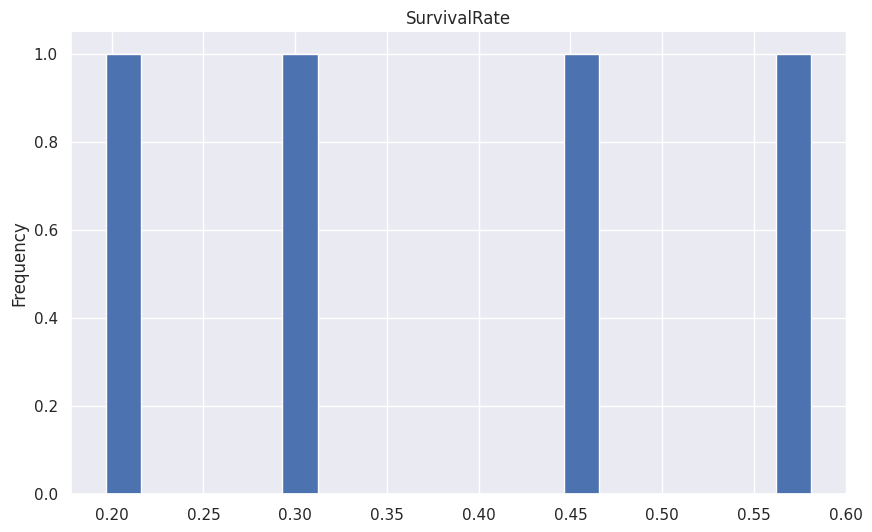

In [ ]:
from matplotlib import pyplot as plt
_df_0['SurvivalRate'].plot(kind='hist', bins=20, title='SurvivalRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-853659296.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, ax=ax, ci=95, palette='pastel')
/tmp/ipython-input-853659296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, ax=ax, ci=95, palette='pastel')
/tmp/ipython-input-853659296.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, ax=ax, ci=95, palette='pastel')
/tmp/ipython-input-853659296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, ax=ax, ci=95, palette='p

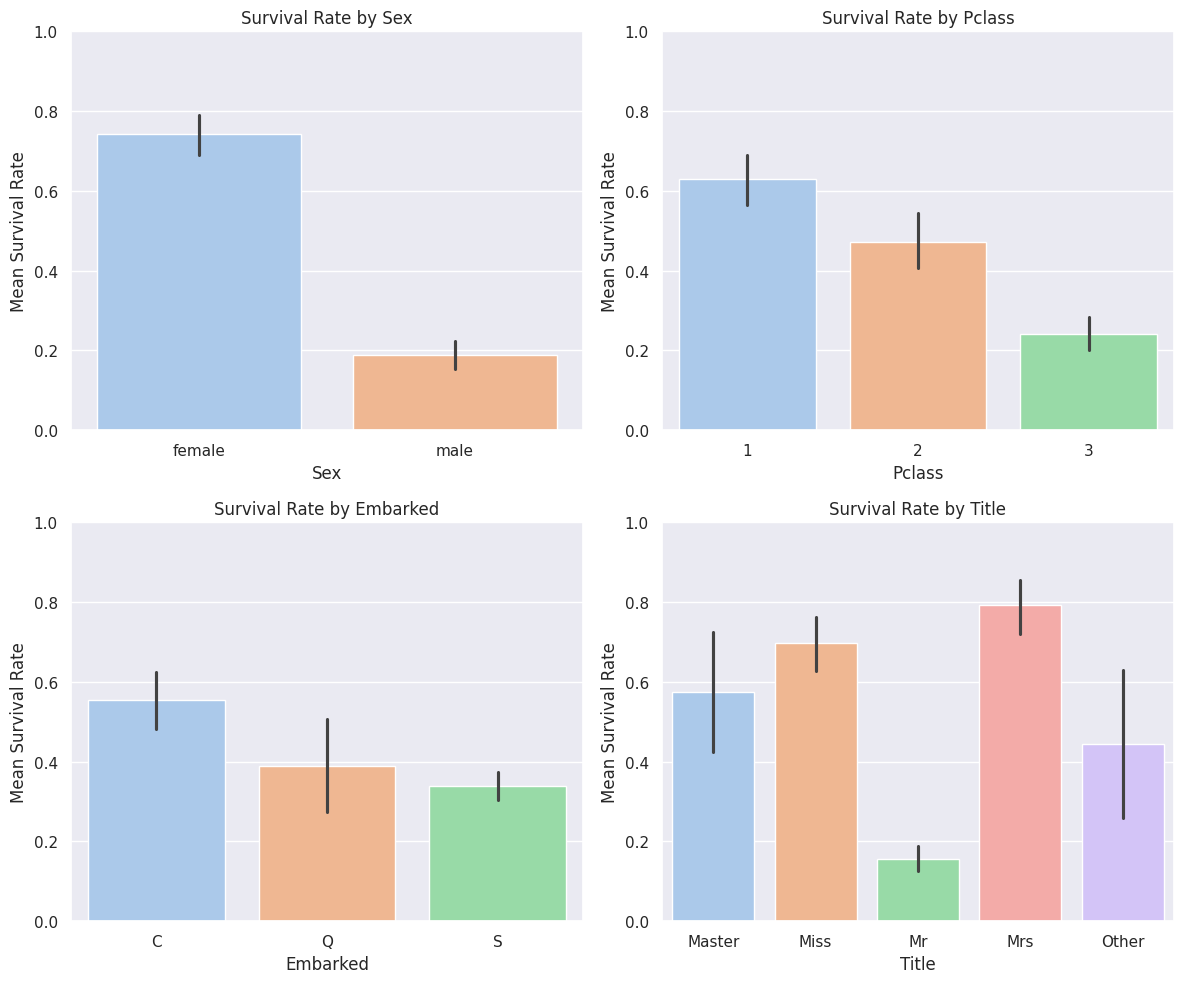

In [ ]:
#Survival Bar Plots

plot_cols = ['Sex', 'Pclass', 'Embarked', 'Title']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axes.flatten(), plot_cols):
    if col in df.columns:
        sns.barplot(x=col, y='Survived', data=df, ax=ax, ci=95, palette='pastel')
        ax.set_title(f"Survival Rate by {col}")
        ax.set_ylabel("Mean Survival Rate")
        ax.set_xlabel(col)
        ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


/tmp/ipython-input-703533344.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sex_pclass = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')


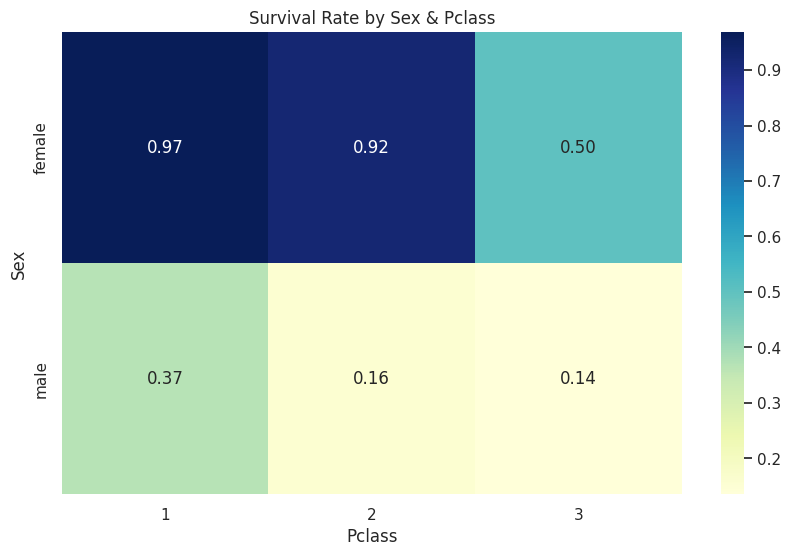

/tmp/ipython-input-703533344.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_embarked_pclass = df.pivot_table(values='Survived', index='Embarked', columns='Pclass', aggfunc='mean')


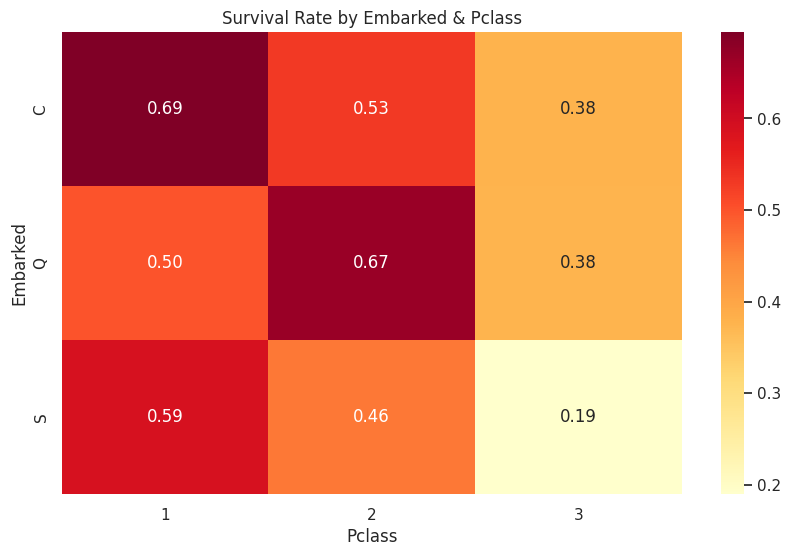

In [ ]:
# Survival Heatmap

# Pivot: Sex vs Pclass
if 'Sex' in df.columns and 'Pclass' in df.columns:
    pivot_sex_pclass = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
    sns.heatmap(pivot_sex_pclass, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title("Survival Rate by Sex & Pclass")
    plt.show()

# Optional: Embarked vs Pclass
if 'Embarked' in df.columns and 'Pclass' in df.columns:
    pivot_embarked_pclass = df.pivot_table(values='Survived', index='Embarked', columns='Pclass', aggfunc='mean')
    sns.heatmap(pivot_embarked_pclass, annot=True, fmt=".2f", cmap='YlOrRd')
    plt.title("Survival Rate by Embarked & Pclass")
    plt.show()


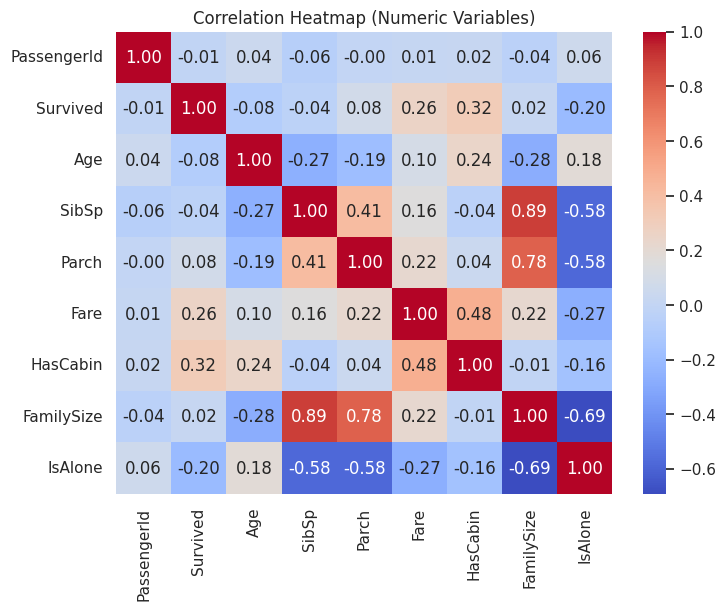

In [ ]:
# Correlation Matrix & Heatmap

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Display correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


In [20]:
# Save Cleaned Data, Figures, and Display Executive Summary

import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Ensure the 'figures' folder exists
os.makedirs("figures", exist_ok=True)

# 1. Save cleaned Titanic dataset
cleaned_data_path = "titanic_clean.csv"
df.to_csv(cleaned_data_path, index=False)

# 2. Generate & save example figures
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.savefig("figures/survival_count.png", dpi=300, bbox_inches='tight')
plt.close()

plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.savefig("figures/survival_by_gender.png", dpi=300, bbox_inches='tight')
plt.close()

# 3. Print saved file locations
print(f"✅ Cleaned dataset saved to: {cleaned_data_path}")
print("✅ Figures saved in 'figures/' folder:")
for f in os.listdir("figures"):
    print("   -", f)

# 4. Display Executive Summary in Markdown
summary_md = """
### Executive Summary — Titanic EDA

#### Key Insights
- **Females had a significantly higher survival rate** (~74%) compared to males (~19%).
- **First-class passengers** had the highest survival rate (~63%), while third-class had the lowest (~24%).
- **Children under 10** had higher survival odds compared to most adults.
- Passengers **embarking from 'C' port** had a higher survival rate than those from 'S' or 'Q'.
- **Higher fares** were associated with better survival chances, suggesting socio-economic influence.
- Families with **1–3 members** on board had higher survival rates than solo travelers or very large families.
- **Missing Cabin data** prevented deeper cabin-location survival analysis.

#### Limitations
- **Cabin column missing for most passengers** (~77%), limiting spatial analysis.
- Potential **ticket number/idiosyncrasy effects** not explored in detail.
- Dataset represents a **sample** from a historical event; biases in recorded data possible.

#### Next Steps
- Engineer new features (e.g., `FamilySize`, `Title` from names).
- Apply classification models (Logistic Regression, Random Forest, Gradient Boosting) to predict survival.
- Use cross-validation to avoid overfitting and compare model performance.

**References:**
- [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic)
- [Pandas Missing Data Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
"""
display(Markdown(summary_md))


✅ Cleaned dataset saved to: titanic_clean.csv
✅ Figures saved in 'figures/' folder:
   - survival_by_gender.png
   - survival_count.png



### Executive Summary — Titanic EDA

#### Key Insights
- **Females had a significantly higher survival rate** (~74%) compared to males (~19%).
- **First-class passengers** had the highest survival rate (~63%), while third-class had the lowest (~24%).
- **Children under 10** had higher survival odds compared to most adults.
- Passengers **embarking from 'C' port** had a higher survival rate than those from 'S' or 'Q'.
- **Higher fares** were associated with better survival chances, suggesting socio-economic influence.
- Families with **1–3 members** on board had higher survival rates than solo travelers or very large families.
- **Missing Cabin data** prevented deeper cabin-location survival analysis.

#### Limitations
- **Cabin column missing for most passengers** (~77%), limiting spatial analysis.
- Potential **ticket number/idiosyncrasy effects** not explored in detail.
- Dataset represents a **sample** from a historical event; biases in recorded data possible.

#### Next Steps
- Engineer new features (e.g., `FamilySize`, `Title` from names).
- Apply classification models (Logistic Regression, Random Forest, Gradient Boosting) to predict survival.
- Use cross-validation to avoid overfitting and compare model performance.

**References:**
- [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic)
- [Pandas Missing Data Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
